# Importing the necessary libraries

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.svm import SVC
df = pd.read_csv('datasets/news_or_not_cleaned.csv')

In [22]:
df.drop(df.filter(regex='Unname'), axis=1, inplace=True)

In [23]:
df

,cleaned,ifNews
0,actually correct illinformed like remove post ...,0
1,librier anon raise issue edit summary agree te...,0
2,article delete redirect history aranorin towns...,0
3,thx sorry article almost certainly make assume...,0
4,course could try recreate scratch good source ...,0
...,...,...
369087,nicole richie relation true nicole richie chri...,0
369088,receive money kgb edit requestrajiv gandhi fam...,0
369089,psy rm close rm consensus decision current tit...,0
369090,use big data force social good,1


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,precision_score,precision_recall_curve,recall_score,f1_score,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_val_score
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=100000,max_df=0.99,min_df=0.01)
X = tfidf_vect.fit_transform(df['cleaned'].values.astype(str))

In [6]:
y = df['ifNews']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print('training shape ', X_train.shape)
print('testing shape ', X_test.shape)

training shape  (258364, 217)
testing shape  (110728, 217)


In [7]:
linear_model = SVC(gamma='auto')
linear_model.fit(X_train, y_train)

SVC(gamma='auto')

In [8]:
predicted = linear_model.predict(X_test)

In [9]:
print(precision_score(y_test, predicted, average="weighted"))
print(recall_score(y_test, predicted, average="weighted"))
print(f1_score(y_test, predicted, average="weighted"))

0.8886236370416818
0.8838324543024348
0.8822859611508986


In [10]:
def compute_accuracy(Y_true, Y_pred):  
    correctly_predicted = 0  
    # iterating over every label and checking it with the true sample  
    for true_label, predicted in zip(Y_true, Y_pred):  
        if true_label == predicted:  
            correctly_predicted += 1  
    # computing the accuracy score  
    accuracy_score = correctly_predicted / len(Y_true)  
    return accuracy_score 

In [11]:
SVM_accuracy = compute_accuracy(y_test, predicted)
print(SVM_accuracy)

0.8838324543024348


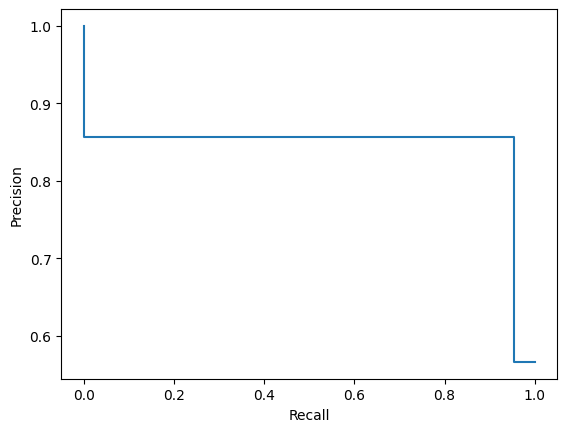

In [13]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt
precision, recall, threshold = precision_recall_curve(y_test, predicted)
prd = PrecisionRecallDisplay(precision, recall)
prd.plot()
resolution_value = 1920
plt.savefig("images/svm_precision_recall.png", format="png", dpi=resolution_value)

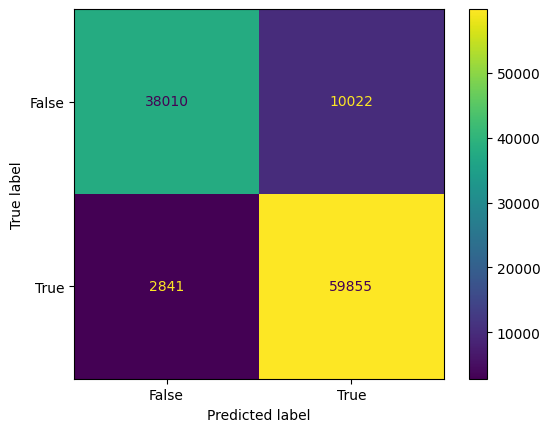

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot(values_format = ".5g")
plt.savefig("images/svm_confusion_matrix.png", format="png", dpi=resolution_value)
plt.show()

In [19]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86     48032
           1       0.86      0.95      0.90     62696

    accuracy                           0.88    110728
   macro avg       0.89      0.87      0.88    110728
weighted avg       0.89      0.88      0.88    110728

